<a href="https://colab.research.google.com/github/agapiko/Early_Detection_Of_DIABETIC_RETINOPATHY/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install kaggle

In [ ]:
#from google.colab import files
#files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"staurosziaragkalis","key":"bc8e5dc04a959d2cd773e57898e26bac"}'}

In [ ]:
#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle competitions download -c aptos2019-blindness-detection -p /content/drive/MyDrive/

100% 9.51G/9.51G [02:20<00:00, 72.8MB/s]
100% 9.51G/9.51G [02:20<00:00, 72.9MB/s]


In [2]:
!unzip '/content/drive/My Drive/aptos2019-blindness-detection.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test_images/512beaada8f0.png  
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/

In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2

In [12]:
df_train = pd.read_csv('/content/train.csv')
print(df_train)

           id_code  diagnosis
0     000c1434d8d7          2
1     001639a390f0          4
2     0024cdab0c1e          1
3     002c21358ce6          0
4     005b95c28852          0
...            ...        ...
3657  ffa47f6a7bf4          2
3658  ffc04fed30e6          0
3659  ffcf7b45f213          2
3660  ffd97f8cd5aa          0
3661  ffec9a18a3ce          2

[3662 rows x 2 columns]


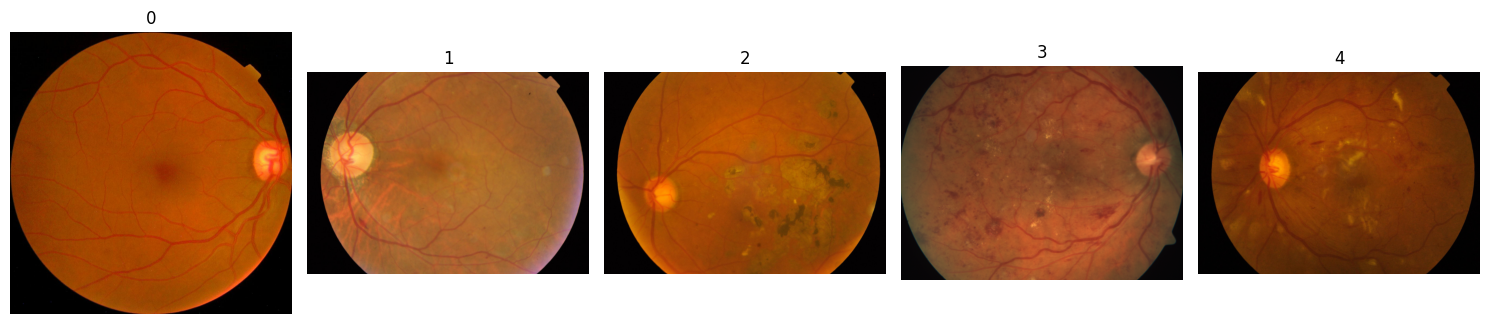

Figure saved as /content/sorted_images_plot.png


In [32]:
unique_categories = sorted(df_train['diagnosis'].unique())
image_folder_path = '/content/train_images'
fig, ax = plt.subplots(1, len(unique_categories), figsize=(15, 5))

for i, category in enumerate(unique_categories):
    sample = df_train[df_train['diagnosis'] == category].sample(1).iloc[0]
    image_id = sample['id_code']
    image_path = os.path.join(image_folder_path, f"{image_id}.png")

    if os.path.exists(image_path):
        image = Image.open(image_path)
        ax[i].imshow(image)
        ax[i].set_title(f"{category}")
        ax[i].axis('off')
    else:
        ax[i].text(0.5, 0.5, 'Image not found', fontsize=12, ha='center')
        ax[i].set_title(f"{category}")
        ax[i].axis('off')

plt.tight_layout()
output_path = '/content/sorted_images_plot.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()
print(f"Figure saved as {output_path}")

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df_train.isnull().sum())


Missing values in each column:
id_code      0
diagnosis    0
dtype: int64


In [ ]:
#summary statistics
numeric_columns = df_train.select_dtypes(include=[np.number])
summary = numeric_columns.describe().transpose()

# Calculate additional statistic
summary['median'] = numeric_columns.median()
summary['kurtosis'] = numeric_columns.kurtosis()
summary['skewness'] = numeric_columns.skew()

summary['missing_values'] = numeric_columns.isnull().sum()
summary['unique_values'] = numeric_columns.nunique()

display(summary)

,count,mean,std,min,25%,50%,75%,max,median,kurtosis,skewness,missing_values,unique_values
diagnosis,3662.0,1.12698,1.298409,0.0,0.0,1.0,2.0,4.0,1.0,-0.502805,0.79212,0,5


In [ ]:
# Check for duplicates
duplicate_rows = df_train[df_train.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


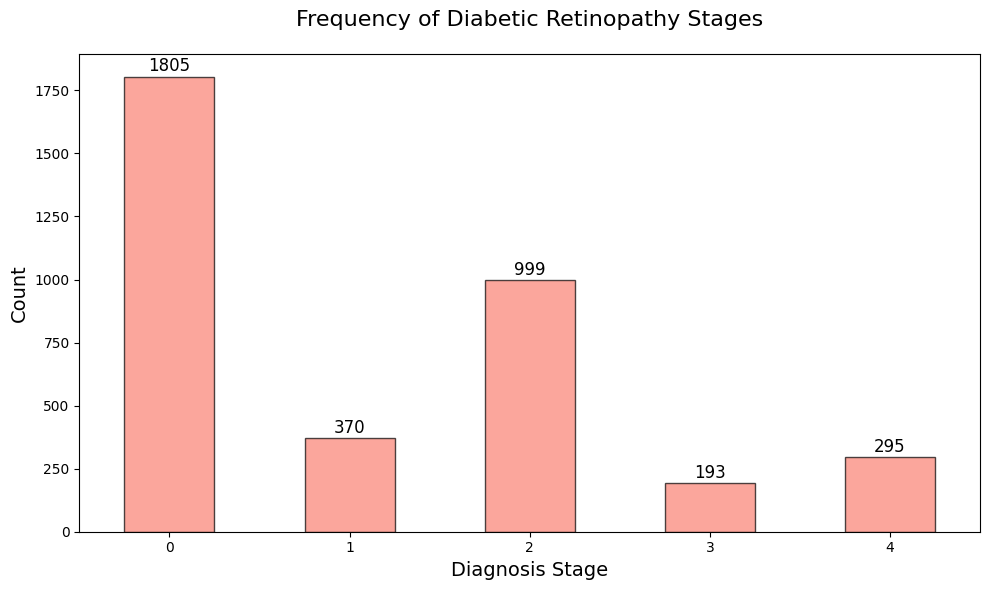

Plot saved as diabetic_retinopathy_class_distribution.png


In [ ]:
class_counts = df_train['diagnosis'].value_counts().sort_index()
bar_color = '#FA8072'
text_color = 'black'

plt.figure(figsize=(10, 6), facecolor='white')
ax = class_counts.plot(kind='bar', color=bar_color, edgecolor='black', alpha=0.7)
plt.title('Frequency of Diabetic Retinopathy Stages', fontsize=16, color=text_color, pad=20)
plt.xlabel('Diagnosis Stage', fontsize=14, color=text_color)
plt.ylabel('Count', fontsize=14, color=text_color)
ax.grid(False)
ax.tick_params(colors=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['left'].set_color(text_color)
plt.xticks(rotation=0)

for index, value in enumerate(class_counts):
    plt.text(index, value + 20, f'{value}', ha='center', fontsize=12, color=text_color)

output_filename = 'diabetic_retinopathy_class_distribution.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"Plot saved as {output_filename}")

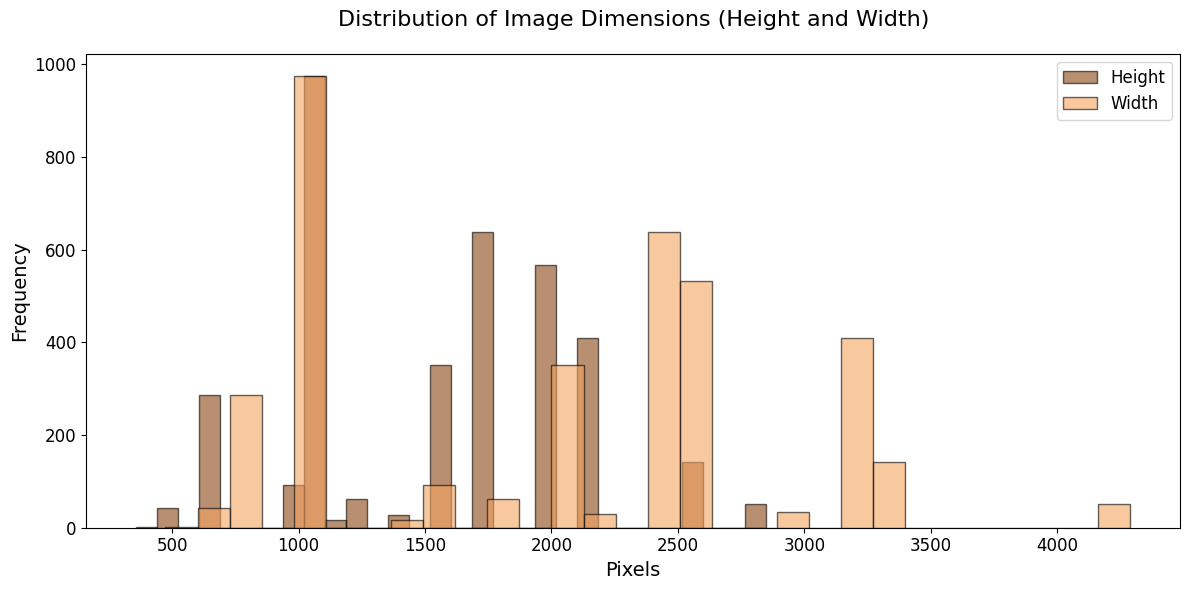

Plot saved as image_dimensions_distribution_combined.png


In [ ]:
image_dimensions = []
for img_name in df_train['id_code']:
    img_path = os.path.join('/content/train_images/', img_name + '.png')
    img = cv2.imread(img_path)
    if img is not None:
        image_dimensions.append(img.shape[:2])

df_dimensions = pd.DataFrame(image_dimensions, columns=['Height', 'Width'])

plt.figure(figsize=(12, 6), facecolor='white')

height_color = 'saddlebrown'
width_color = 'sandybrown'
text_color = 'black'

plt.hist(df_dimensions['Height'], bins=30, alpha=0.6, label='Height', color=height_color, edgecolor='black')

plt.hist(df_dimensions['Width'], bins=30, alpha=0.6, label='Width', color=width_color, edgecolor='black')
plt.title('Distribution of Image Dimensions (Height and Width)', fontsize=16, color=text_color, pad=20)
plt.xlabel('Pixels', fontsize=14, color=text_color)
plt.ylabel('Frequency', fontsize=14, color=text_color)

plt.xticks(color=text_color, fontsize=12)
plt.yticks(color=text_color, fontsize=12)

plt.legend(fontsize=12, loc='upper right')
plt.grid(False)
output_filename = 'image_dimensions_distribution_combined.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"Plot saved as {output_filename}")

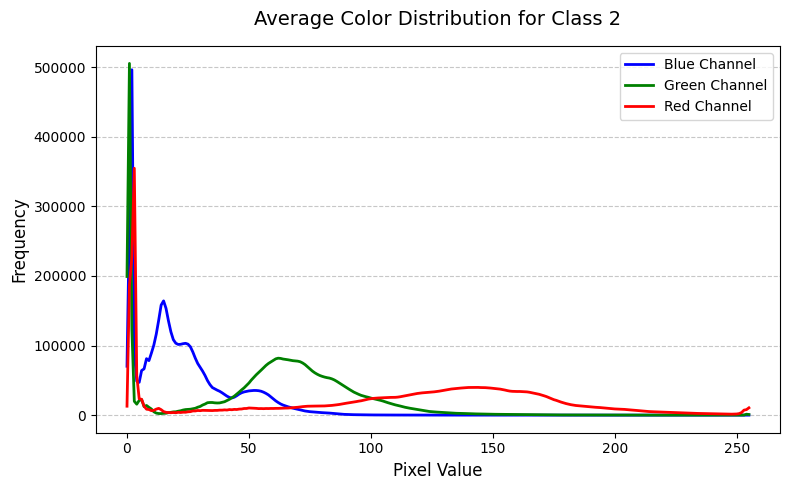

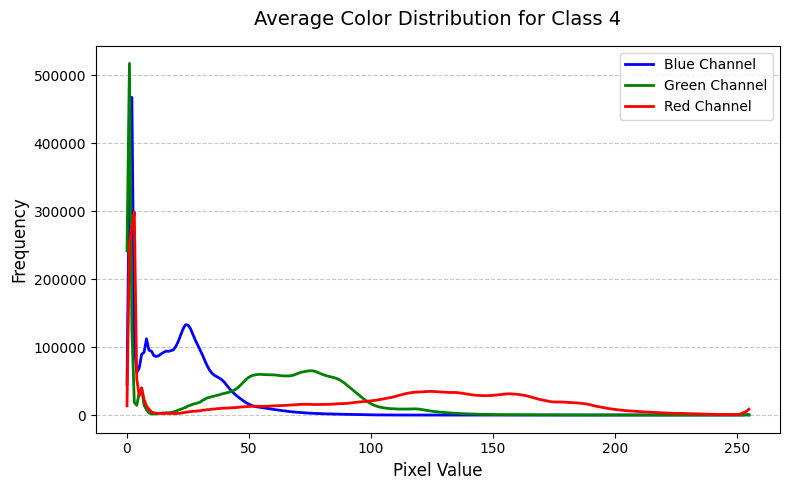

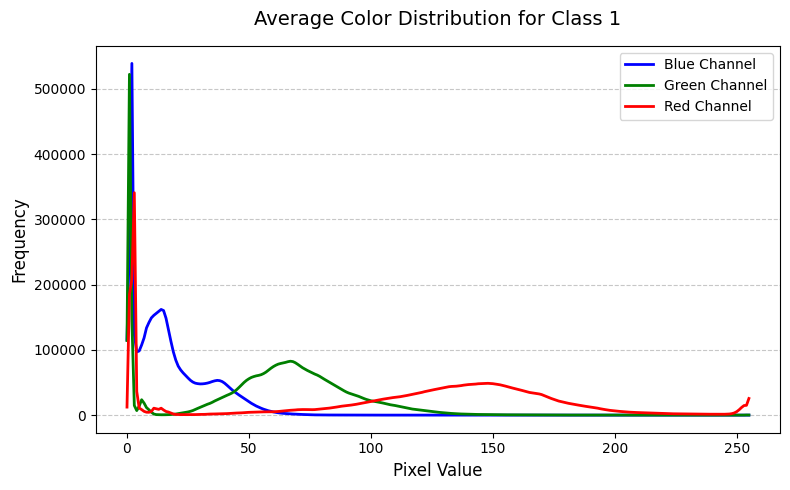

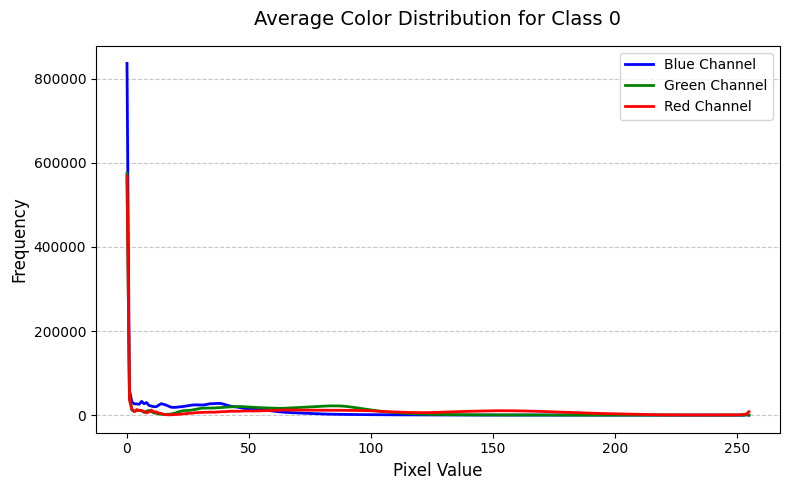

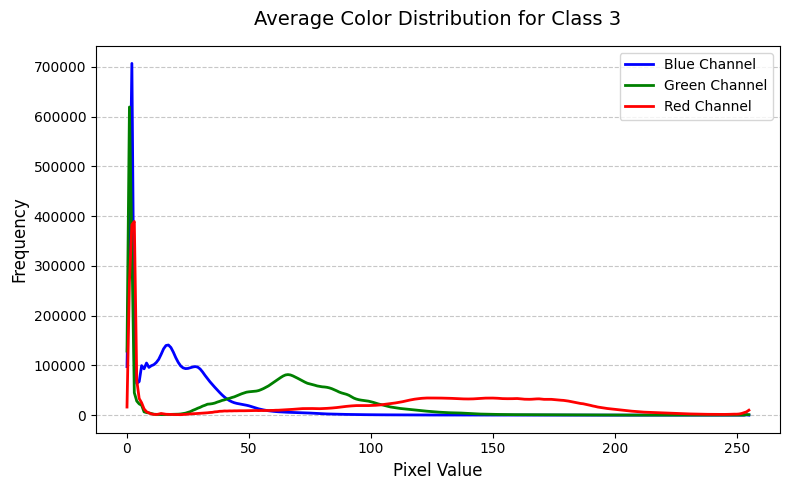

In [ ]:
def plot_color_distribution_by_class(df, class_label, num_samples=100):
    hist_blue = np.zeros((256,))
    hist_green = np.zeros((256,))
    hist_red = np.zeros((256,))

    class_images = df[df['diagnosis'] == class_label].sample(num_samples)['id_code'].values

    for img_name in class_images:
        image_path = os.path.join('/content/train_images/', img_name + '.png')
        image = cv2.imread(image_path)
        if image is not None:
            hist_blue += cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
            hist_green += cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
            hist_red += cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()

    hist_blue /= len(class_images)
    hist_green /= len(class_images)
    hist_red /= len(class_images)

    plt.figure(figsize=(8, 5), facecolor='white')
    plt.plot(hist_blue, color='b', label='Blue Channel', linewidth=2)
    plt.plot(hist_green, color='g', label='Green Channel', linewidth=2)
    plt.plot(hist_red, color='r', label='Red Channel', linewidth=2)

    plt.title(f'Average Color Distribution for Class {class_label}', fontsize=14, pad=15)
    plt.xlabel('Pixel Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=10, loc='upper right')

    output_filename = f'color_distribution_class_{class_label}.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

for class_label in df_train['diagnosis'].unique():
    plot_color_distribution_by_class(df_train, class_label, num_samples=50)


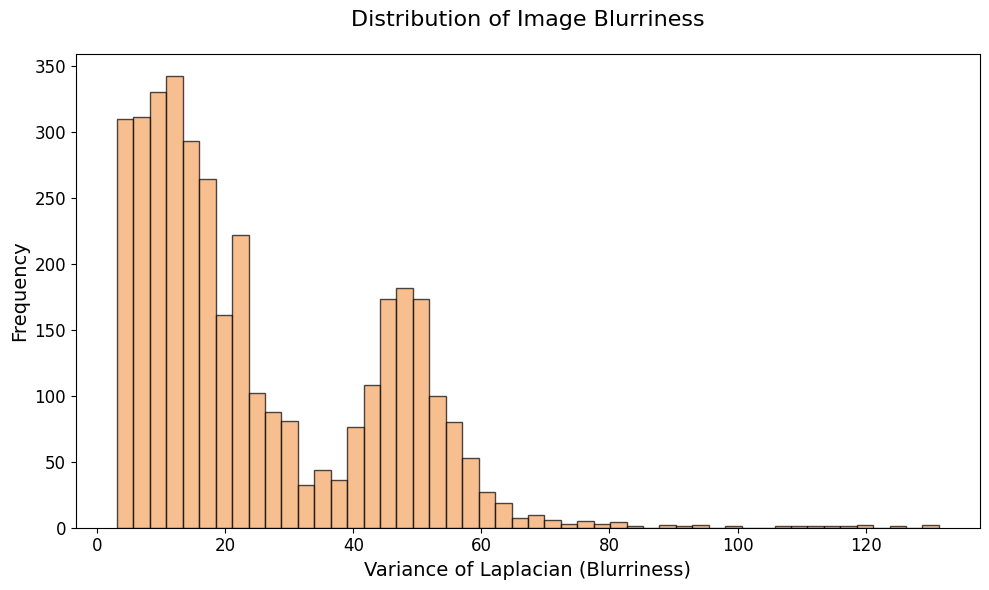

Plot saved as image_blurriness_distribution.png


In [ ]:
def calculate_blurriness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return cv2.Laplacian(image, cv2.CV_64F).var()

df_train['blurriness'] = df_train['id_code'].apply(lambda x: calculate_blurriness(os.path.join('/content/train_images/', x + '.png')))

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(df_train['blurriness'], bins=50, color='sandybrown', edgecolor='black', alpha=0.7)

plt.title('Distribution of Image Blurriness', fontsize=16, pad=20)
plt.xlabel('Variance of Laplacian (Blurriness)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

output_filename = 'image_blurriness_distribution.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"Plot saved as {output_filename}")

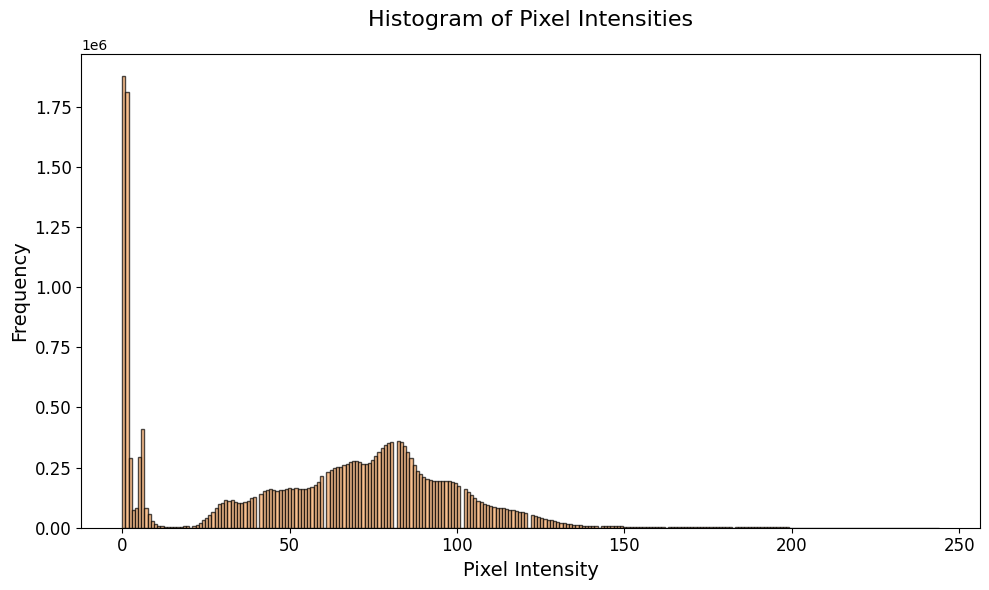

Plot saved as sampled_pixel_intensity_histogram.png


In [ ]:
sampled_images = df_train.sample(5, random_state=42)['id_code']

all_pixel_values = []

for img_name in sampled_images:
    img_path = os.path.join('/content/train_images/', img_name + '.png')
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        all_pixel_values.extend(image.ravel())

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(all_pixel_values, bins=256, color='sandybrown', edgecolor='black', alpha=0.7)
plt.title('Histogram of Pixel Intensities', fontsize=16, pad=20)
plt.xlabel('Pixel Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

output_filename = 'sampled_pixel_intensity_histogram.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

print(f"Plot saved as {output_filename}")